In [20]:
import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
# Define the percentage of data for each split
train_split = 0.7
test_split = 0.2
val_split = 0.1

In [22]:
data_path = 'E:/project7/root/Data'
train_path = 'E:/project7/root/train'
test_path = 'E:/project7/root/test'
val_path = 'E:/project7/root/valid'

In [23]:
# Create train, validation, and test directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)


In [24]:
# Loop over each category and copy images to train, validation, and test folders
for category in os.listdir(data_path):
    os.makedirs(os.path.join(train_path, category), exist_ok=True)
    os.makedirs(os.path.join(val_path, category), exist_ok=True)
    os.makedirs(os.path.join(test_path, category), exist_ok=True)
    
    image_files = os.listdir(os.path.join(data_path, category))
    num_images = len(image_files)
    num_train = int(num_images * train_split)
    num_val = int(num_images * val_split)
    num_test = num_images - num_train - num_val
    
    # Shuffle image files
    random.shuffle(image_files)
    
    # Copy the first num_train images to the train directory
    for i in range(num_train):
        src = os.path.join(data_path, category, image_files[i])
        dst = os.path.join(train_path, category, image_files[i])
        shutil.copyfile(src, dst)
    
    # Copy the next num_val images to the validation directory
    for i in range(num_train, num_train+num_val):
        src = os.path.join(data_path, category, image_files[i])
        dst = os.path.join(val_path, category, image_files[i])
        shutil.copyfile(src, dst)
    
    # Copy the remaining images to the test directory
    for i in range(num_train+num_val, num_images):
        src = os.path.join(data_path, category, image_files[i])
        dst = os.path.join(test_path, category, image_files[i])
        shutil.copyfile(src, dst)


In [25]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               rotation_range=5,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               shear_range=0.2,
                                                               zoom_range=0.2,
                                                               horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory('E:/project7/root/train',
                                                  target_size=(224, 224),
                                                  batch_size=24,   #add 26 for a to z in all places where there is 15
                                                  class_mode='categorical')

val_dataset = val_datagen.flow_from_directory('E:/project7/root/valid',
                                              target_size=(224, 224),
                                              batch_size=24,
                                              class_mode='categorical')

test_dataset = test_datagen.flow_from_directory('E:/project7/root/test',
                                                target_size=(224, 224),
                                                batch_size=24,
                                                class_mode='categorical')


Found 2694 images belonging to 24 classes.
Found 529 images belonging to 24 classes.
Found 1100 images belonging to 24 classes.


In [5]:
# # Load the train dataset
# import cv2
# import matplotlib.pyplot as plt
# # first_image = np.array(test_dataset[0][0][0])
# first_image=cv2.imread('0.png')
# # Print the shape of the first image
# print(first_image.shape)
# # gray = cv2.cvtColor(first_image,cv2.COLOR_BGR2GRAY)
# # print(gray.shape)
# # plt.imshow(first_image)
# # plt.show()

In [26]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(24, activation='softmax') #26
])

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(train_dataset, 
                    epochs=20, 
                    validation_data=val_dataset)

Epoch 1/20
113/113 [==============================] - 216s 2s/step - loss: 3.1734 - accuracy: 0.0690 - val_loss: 3.1621 - val_accuracy: 0.0510
Epoch 2/20
113/113 [==============================] - 213s 2s/step - loss: 3.1203 - accuracy: 0.0791 - val_loss: 3.0313 - val_accuracy: 0.1248
Epoch 3/20
113/113 [==============================] - 205s 2s/step - loss: 2.9699 - accuracy: 0.1162 - val_loss: 2.7086 - val_accuracy: 0.1966
Epoch 4/20
113/113 [==============================] - 206s 2s/step - loss: 2.6765 - accuracy: 0.1774 - val_loss: 2.4460 - val_accuracy: 0.2533
Epoch 5/20
113/113 [==============================] - 206s 2s/step - loss: 2.3860 - accuracy: 0.2442 - val_loss: 1.9837 - val_accuracy: 0.3573
Epoch 6/20
113/113 [==============================] - 204s 2s/step - loss: 2.1885 - accuracy: 0.2817 - val_loss: 1.7795 - val_accuracy: 0.4008
Epoch 7/20
113/113 [==============================] - 203s 2s/step - loss: 1.8973 - accuracy: 0.3575 - val_loss: 1.5705 - val_accuracy: 0.4839

In [29]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

46/46 [==============================] - 38s 836ms/step - loss: 0.5405 - accuracy: 0.7900
Test accuracy: 0.7900000214576721


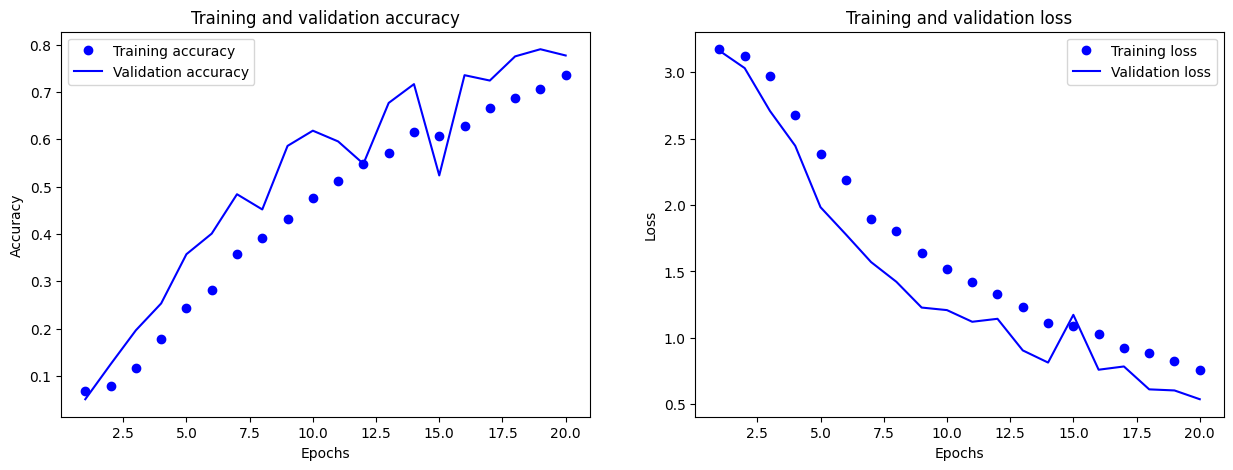

In [30]:
# Plot the training and validation accuracy and loss over time
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [18]:
pip install h5py

In [31]:
# Save the model for future use
model.save('model.h5')